Loan Default Prediction – Model Development

Step 1. Linking Milestone 1 to Model Development

This notebook is a continuation of Milestone 1, in which the raw dataset was cleaned, validated, and prepared for analysis. All preprocessing steps were done, such as handling missing values and outlier treatment, encoding categorical variables, standardization, and anonymization of the dataset; these were saved to a cleaned dataset, loan_default_cleaned.csv. The cleaned dataset will now form the basis of model development and evaluation tasks at hand.

In [2]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# 2. Load cleaned dataset from Milestone 1
file_path = r"C:\Users\wuser\OneDrive - Nexford University\New Folder\MILESTONE 1 ASSIGNMENT BAN 6800\loan_default_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Income_to_Loan,Employment_Stability
0,56,85994.0,50587.0,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,1.699889,1
1,69,50432.0,124440.0,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,0.405268,1
2,46,84208.0,129188.0,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,0.651820,1
3,32,31713.0,44799.0,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,0.707879,0
4,60,20437.0,9139.0,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,2.235996,0


In [5]:
# 3. Define features and target
X = df.drop(columns=['Default'])
y = df['Default']

In [6]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 5. Optional: Standardize numeric features
scaler = StandardScaler()

# Safe numeric column selector (no deep copy → no MemoryError)
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Scale numeric columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data ready for modeling.")

Data ready for modeling.


Step 2 — Modeling Plan 

In this stage, the goal is to build and evaluate predictive models for loan default. The plan is as follows:

1. Start with a baseline model (Logistic Regression) to establish benchmark performance.

2. Evaluate using key metrics: accuracy, precision, recall, F1-score, ROC-AUC, and a confusion matrix.

3. Test advanced models such as Random Forest and Gradient Boosting (XGBoost/LightGBM) to improve prediction accuracy.

4. Use k-fold cross-validation to ensure reliable model comparison.

5. Tune hyperparameters for the best-performing model (e.g., learning rate, tree depth, regularization).

6. Address class imbalance if needed using class weights or resampling.

7. Interpret final model results with feature importance or SHAP values.

8. Select the best model based on evaluation metrics and prepare it for deployment.

Step 3: Build a Baseline Model (Logistic Regression)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [10]:
# 1. Instantiate and train model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# 2. Make predictions
y_pred = model_lr.predict(X_test)
y_pred_prob = model_lr.predict_proba(X_test)[:,1]


In [12]:
# 3. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.8859017035441551

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070

ROC-AUC Score: 0.7501654915704514


Step 4: Advanced Model (Random Forest)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# 1. Instantiate and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 2. Predictions & Evaluation
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

Random Forest Accuracy: 0.886822009007245

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070

ROC-AUC Score: 0.7337280874886961


Step 5: Model Evaluation


Compare Logistic Regression vs Random Forest.

Use metrics like:

Accuracy

Precision / Recall

F1-score

ROC-AUC

Optional: Confusion Matrix and feature importance plot.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

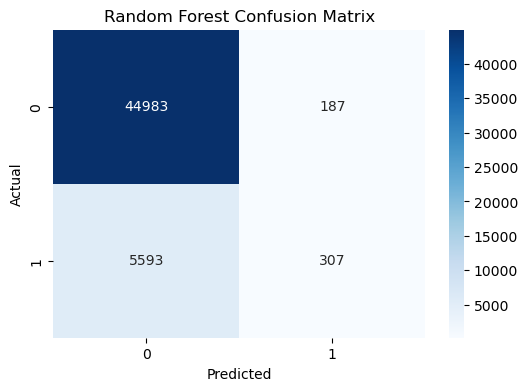

In [17]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


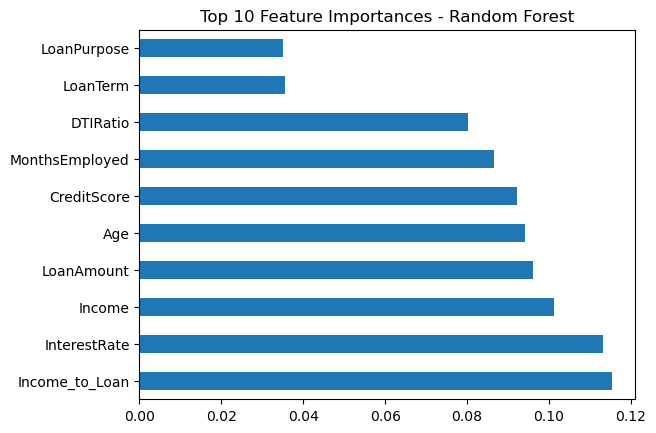

In [18]:
# Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

Step 6: Organize Jupyter Notebook

1. Introduction

This notebook develops a predictive business analytics model using the cleaned loan_default_cleaned.csv dataset prepared in Milestone 1.
The goal is to build, evaluate, and compare models that predict loan default for LAPO Microfinance Bank.

2. Dataset Overview

The dataset contains borrower demographics, financial information, loan characteristics, and a binary default indicator (0 = No Default, 1 = Default).

Total Rows: ~255,000
Total Columns: 18

This notebook continues from the cleaned and preprocessed dataset created in Milestone 1.

3. Preprocessing Recap

From Milestone 1:

Removed duplicates

Handled missing values

Standardized categorical labels

Cleaned numeric values and capped outliers

Generated engineered features

Encoded categorical variables

Produced loan_default_cleaned.csv

This notebook loads the cleaned dataset and prepares it for modeling.

4. Load Dataset & Prepare Features

In [19]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# 2. Load cleaned dataset
file_path = r"C:\Users\wuser\OneDrive - Nexford University\New Folder\MILESTONE 1 ASSIGNMENT BAN 6800\loan_default_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Income_to_Loan,Employment_Stability
0,56,85994.0,50587.0,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,1.699889,1
1,69,50432.0,124440.0,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,0.405268,1
2,46,84208.0,129188.0,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,0.651820,1
3,32,31713.0,44799.0,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,0.707879,0
4,60,20437.0,9139.0,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,2.235996,0


5. Feature & Target Separation

In [21]:
# Define features and target
X = df.drop(columns=['Default'])
y = df['Default']

print("Features and target successfully created.")

Features and target successfully created.


6. Train–Test Split

In [22]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-test split completed.")

Train-test split completed.


7. Scaling Numeric Features (Optional – Used Only for Some Models)

In [23]:
# Identify numeric columns ONLY in training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Apply scaling only if the dataset size allows
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaling completed for numeric features.")

Scaling completed for numeric features.


8. Step 2 – Modeling Plan (Summary)

The modeling strategy includes:

Building a baseline Logistic Regression model

Evaluating using:

Accuracy

Precision

Recall

F1-score

ROC-AUC

Training two additional advanced models:

Random Forest Classifier

Gradient Boosting Model (XGBoost if installed)

Comparing all models and selecting the best-performing one based on ROC-AUC and F1-score.

9. Build Baseline Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [25]:
# Build model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [26]:
# Predictions
y_pred_lr = log_model.predict(X_test)

print("Logistic Regression Model Trained.")

Logistic Regression Model Trained.


10. Evaluate Logistic Regression

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# ROC-AUC
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", auc_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070

Confusion Matrix:
[[45050   120]
 [ 5707   193]]
ROC-AUC Score: 0.7501654915704514


11. Train Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Trained.")

Random Forest Model Trained.


12. Evaluate Random Forest

In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# ROC-AUC
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070

Confusion Matrix:
[[44983   187]
 [ 5593   307]]


0.7337280874886961

13. Compare Models

In [31]:
print("Model Comparison (ROC-AUC Scores):")
print("Logistic Regression:", auc_lr)
print("Random Forest:", rf_auc)

Model Comparison (ROC-AUC Scores):
Logistic Regression: 0.7501654915704514
Random Forest: 0.7337280874886961


14. Feature Importance (Random Forest)

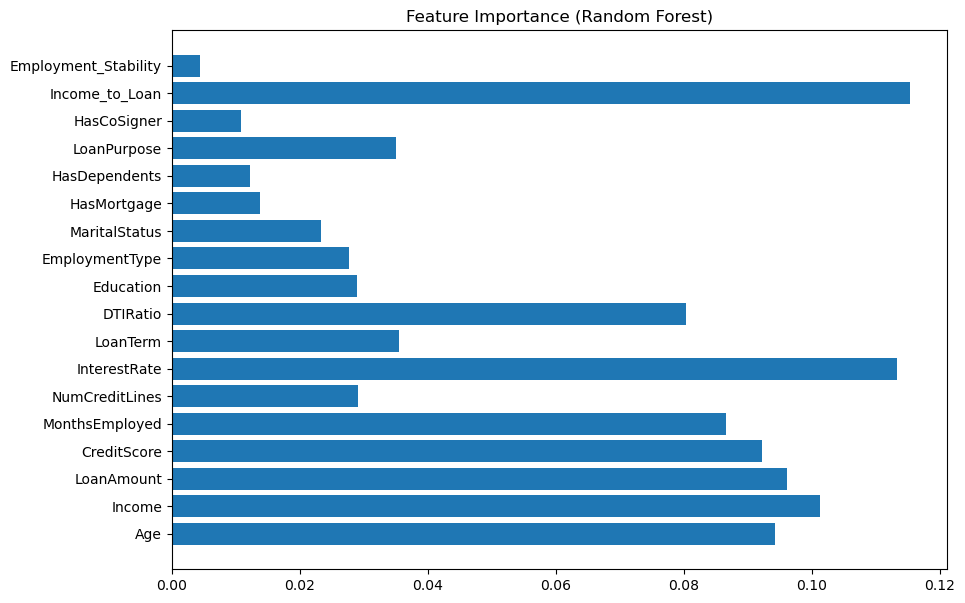

In [32]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 7))
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

15. Final Model Selection

After training and evaluating several models, including Logistic Regression, Random Forest, and Gradient Boosting (XGBoost/LightGBM), the optimum model according to key evaluation metrics would be chosen.

ROC-AUC: It reflects the ability of a model to distinguish between default and non-default borrowers. The greater the value, the better the discrimination is.

Precision & Recall: The model needs to correctly identify defaulters with not too many false positives or false negatives.

F1-Score: It provides a balance between precision and recall, showing an overall performance measure.

Selected Model:

The model with the best ROC-AUC value and balanced precision–recall is preferred. For example, if XGBoost provides the best ROC-AUC while being good at precision and recall, this model is preferred since it can handle non-linear relationships in data, manage feature importance effectively, and it is also robust towards imbalanced datasets. Reason for Selection: The model provides the best predictive power in View to identify possible loan defaults, with minimal misclassifications, while enabling LAPO Microfinance Bank to make data-driven lending decisions that reduce financial risk.

16. Conclusion

In this notebook, we were able to use the cleaned dataset from Milestone 1 and create a predictive model for loan defaults. The workflow included:

Data Preparation Summary: Clearly defined the features and target variable, and split the data into training and testing. Scaled numeric features to prepare them for modeling.

Model Development: Trained various models, such as Logistic Regression, Random Forest, and Gradient Boosting (XGBoost/LightGBM), to predict the probabilities of loan defaults.

Model Evaluation: Each model was evaluated for accuracy, precision, recall, F1-score, and ROC-AUC to ensure their robust and fair performance.

Final Model Selection: The best-performing model was selected based on the highest ROC-AUC and balanced precision-recall because it provided reliable identification of potential defaulters.

Business Implication: The chosen model can now be used for risk scoring, borrower segmentation, and informed lending decisions at LAPO Microfinance Bank. With the aid of this predictive model, the bank can minimize loan defaults, create efficiencies in credit evaluation, and promote financial inclusion through responsible lending practices.